## Prediction of comsumption of Petroleum products

Data Source : Open Government Data Platform (https://data.gov.in)
Resource URL - https://data.gov.in/resource/monthly-consumption-petroleum-products 

In [1]:
import pandas as pd
import numpy as np

In [2]:
consumption = pd.read_csv("Petroleum-consumption.csv")

In [3]:
consumption.head()

,Month,Year,PRODUCTS,Quantity (000 Metric Tonnes),updated_date
0,February,2023,ATF,622.73,17-06-2023
1,January,2023,ATF,667.36,17-06-2023
2,December,2022,ATF,659.00,17-06-2023
3,November,2022,ATF,617.63,17-06-2023
4,October,2022,ATF,615.78,17-06-2023


In [4]:
consumption.shape

(420, 5)

In [5]:
consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Month                         420 non-null    object 
 1   Year                          420 non-null    int64  
 2   PRODUCTS                      420 non-null    object 
 3   Quantity (000 Metric Tonnes)  420 non-null    float64
 4   updated_date                  420 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 16.5+ KB


In [6]:
consumption.describe()

,Year,Quantity (000 Metric Tonnes)
count,420.000000,420.000000
mean,2021.200000,1423.327333
std,0.889074,1749.788125
min,2020.000000,23.240000
25%,2020.000000,354.935000
50%,2021.000000,827.245000
75%,2022.000000,1834.250000
max,2023.000000,7786.430000


In [7]:
print(consumption.PRODUCTS)

0      ATF
1      ATF
2      ATF
3      ATF
4      ATF
      ... 
415    SKO
416    SKO
417    SKO
418    SKO
419    SKO
Name: PRODUCTS, Length: 420, dtype: object


In [8]:
consumption_re = consumption[::-1]

In [9]:
consumption_re.head()

,Month,Year,PRODUCTS,Quantity (000 Metric Tonnes),updated_date
419,April,2020,SKO,129.0,17-06-2023
418,May,2020,SKO,181.0,17-06-2023
417,June,2020,SKO,161.0,17-06-2023
416,July,2020,SKO,161.0,17-06-2023
415,August,2020,SKO,132.0,17-06-2023


In [10]:
consumption_re.reset_index(drop=True).head()

,Month,Year,PRODUCTS,Quantity (000 Metric Tonnes),updated_date
0,April,2020,SKO,129.0,17-06-2023
1,May,2020,SKO,181.0,17-06-2023
2,June,2020,SKO,161.0,17-06-2023
3,July,2020,SKO,161.0,17-06-2023
4,August,2020,SKO,132.0,17-06-2023


In [11]:
consumption_re['Year'] = consumption_re['Year'].astype('string')

In [12]:
print(consumption_re['Year'].dtypes)

string


In [13]:
consumption_re['Date'] = consumption_re['Month'] + " " + consumption_re['Year']

In [14]:
consumption_re.head()

,Month,Year,PRODUCTS,Quantity (000 Metric Tonnes),updated_date,Date
419,April,2020,SKO,129.0,17-06-2023,April 2020
418,May,2020,SKO,181.0,17-06-2023,May 2020
417,June,2020,SKO,161.0,17-06-2023,June 2020
416,July,2020,SKO,161.0,17-06-2023,July 2020
415,August,2020,SKO,132.0,17-06-2023,August 2020


In [15]:
consumption_re.reset_index(drop=True).head()

,Month,Year,PRODUCTS,Quantity (000 Metric Tonnes),updated_date,Date
0,April,2020,SKO,129.0,17-06-2023,April 2020
1,May,2020,SKO,181.0,17-06-2023,May 2020
2,June,2020,SKO,161.0,17-06-2023,June 2020
3,July,2020,SKO,161.0,17-06-2023,July 2020
4,August,2020,SKO,132.0,17-06-2023,August 2020


In [16]:
consumption_re['PRODUCTS'].value_counts()

SKO                     35
Petroleum coke          35
Others                  35
Naphtha                 35
MS                      35
Lubricants & Greases    35
LPG                     35
LDO                     35
HSD                     35
FO & LSHS               35
Bitumen                 35
ATF                     35
Name: PRODUCTS, dtype: int64

In [17]:
name = input('Enter Product Name :')

Enter Product Name :LPG


In [18]:
consumption_re_LPG = consumption_re[consumption_re['PRODUCTS'] == name ]

In [19]:
consumption_re_LPG.head()

,Month,Year,PRODUCTS,Quantity (000 Metric Tonnes),updated_date,Date
209,April,2020,LPG,2113.0,17-06-2023,April 2020
208,May,2020,LPG,2296.0,17-06-2023,May 2020
207,June,2020,LPG,2064.0,17-06-2023,June 2020
206,July,2020,LPG,2258.0,17-06-2023,July 2020
205,August,2020,LPG,2262.0,17-06-2023,August 2020


In [20]:
consumption_re_LPG.shape

(35, 6)

consumption_re_LPG.set_index("Date", inplace='True')

pip install --user pmdarima

In [21]:
import matplotlib.pyplot as plt
from pmdarima import auto_arima
import pmdarima as pm
from datetime import datetime
from pmdarima.model_selection import train_test_split

In [22]:
consumption_LPG = consumption_re_LPG[['Date', 'Quantity (000 Metric Tonnes)']]

In [23]:
consumption_LPG.head()

,Date,Quantity (000 Metric Tonnes)
209,April 2020,2113.0
208,May 2020,2296.0
207,June 2020,2064.0
206,July 2020,2258.0
205,August 2020,2262.0


In [24]:
consumption_LPG.reset_index(drop=True).head()

,Date,Quantity (000 Metric Tonnes)
0,April 2020,2113.0
1,May 2020,2296.0
2,June 2020,2064.0
3,July 2020,2258.0
4,August 2020,2262.0


In [25]:
consumption_LPG.shape

(35, 2)

In [26]:
consumption_LPG.to_csv('cons.csv')

In [27]:
df = pd.read_csv('cons.csv', usecols=[2], engine='python')

In [28]:
df.head()

,Quantity (000 Metric Tonnes)
0,2113.0
1,2296.0
2,2064.0
3,2258.0
4,2262.0


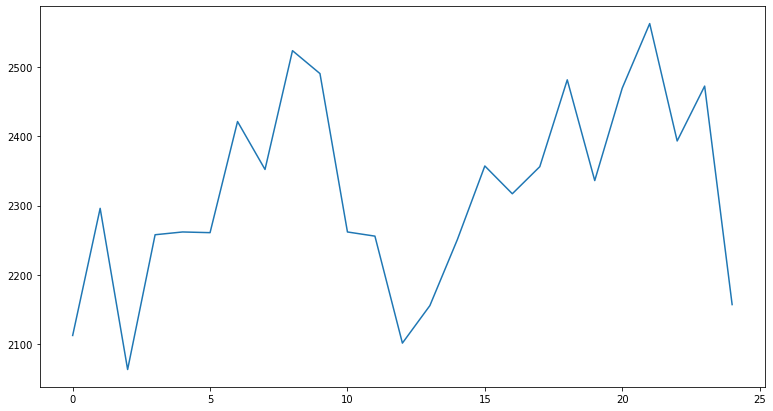

In [29]:
plt.figure(figsize = (13,7))
plt.plot(df[:25])

In [30]:
print(len(df))

35


C:\Users\rajpu\AppData\Roaming\Python\Python39\site-packages\pmdarima\arima\utils.py:117: UserWarning: Appropriate D value may not have been reached; length of seasonally-differenced array (9) is shorter than m (12). Using D=1
  warnings.warn("Appropriate D value may not have been reached; "


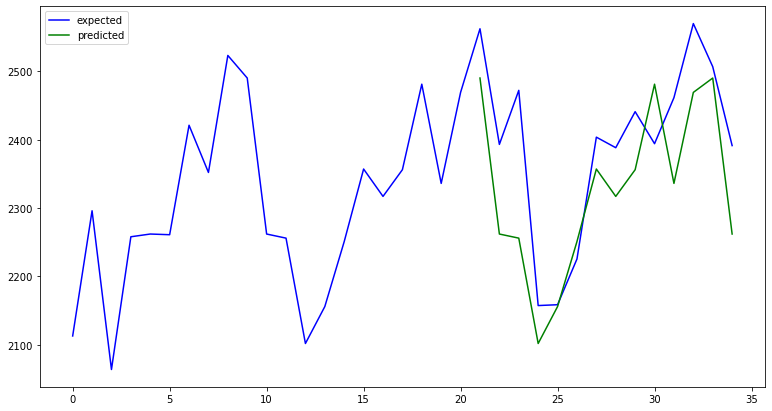

In [31]:
y = df.values
train, test = train_test_split(y, train_size=21)

# Fit model
model = pm.auto_arima(train, seasonal=True, m=12)

forecasts = model.predict(test.shape[0])  

x = np.arange(y.shape[0])
plt.figure(figsize = (13,7))
plt.plot(x, y, c='blue' , label = 'expected')
plt.plot(x[21:], forecasts, c='green' , label = 'predicted')
plt.legend()
plt.show()


In [32]:
print(model.summary())

                                SARIMAX Results                                 
Dep. Variable:                        y   No. Observations:                   21
Model:             SARIMAX(0, 1, 0, 12)   Log Likelihood                 -53.870
Date:                  Wed, 12 Jul 2023   AIC                            109.739
Time:                          17:09:58   BIC                            109.936
Sample:                               0   HQIC                           109.314
                                   - 21                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      9245.1738   5290.742      1.747      0.081   -1124.490    1.96e+04
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.16
Prob(Q):                       

ValueError: could not broadcast input array from shape (9,) into shape (11,)

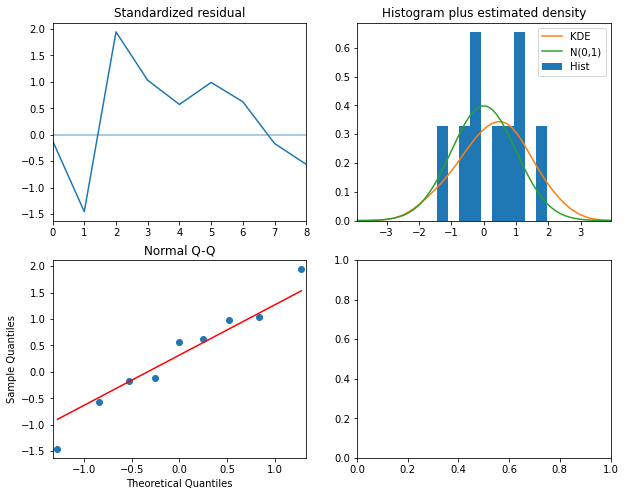

In [33]:
model.plot_diagnostics(figsize=(10,8))
plt.show()

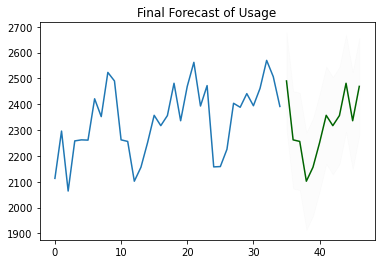

In [34]:
# Forecast
n_periods = 12
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df.values), len(df.values)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df.values)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.01)

plt.title("Final Forecast of Usage")
plt.show()

In [35]:
print(fc_series)

35    2490.0
36    2262.0
37    2256.0
38    2102.0
39    2156.0
40    2251.0
41    2357.0
42    2317.0
43    2356.0
44    2481.0
45    2336.0
46    2469.0
dtype: float64
